In [10]:
#This notebook is for generating the data that are used in Figure 1(c) of the main text.

In [11]:
import pygsti
from pygsti.construction import std1Q_XYI
import pickle
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
ds_exp = pygsti.io.load_dataset('../ExperimentalData/2015_03_30-GST_BB1_XYXY_8192_condensed.txt')

Loading ../ExperimentalData/2015_03_30-GST_BB1_XYXY_8192_condensed.txt: 100%


In [13]:
results = pickle.load(open('../ComputedObjects/2015_03_30-GST_BB1_XYXY_8192_condensed.pkl','r'))

In [14]:
best_gate_set = results.gatesets['final estimate']

In [15]:
ds_sim = pygsti.construction.generate_fake_data(best_gate_set,ds_exp.keys(),50,sampleError='none')

In [16]:
gatestrings = ds_exp.keys()
germs = std1Q_XYI.germs

In [17]:
LList = [2**k for k in range(0,14)]
expCountList = []
simCountList = []
germVal = 'Gx'
print "L\tExp. counts (out of 50)\t\tSim. counts (out of 50)"
for L in LList:
    expCountList.append(ds_exp[(germVal,)*L]['plus'])
    simCountList.append(ds_sim[(germVal,)*L]['plus'])
    print str(L)+'\t'+str(expCountList[-1])+'\t\t\t\t'+str(simCountList[-1])

L	Exp. counts (out of 50)		Sim. counts (out of 50)
1	25.0				25.0609422816
2	50.0				49.4276128448
4	0.0				0.21773729658
8	0.0				0.227110723995
16	1.0				0.245850350029
32	0.0				0.283300687717
64	0.0				0.358085712354
128	0.0				0.50719321888
256	1.0				0.803558636869
512	1.0				1.38889717923
1024	0.0				2.53007654129
2048	7.0				4.69535228928
4096	12.0				8.56940039596
8192	21.0				14.6373419291


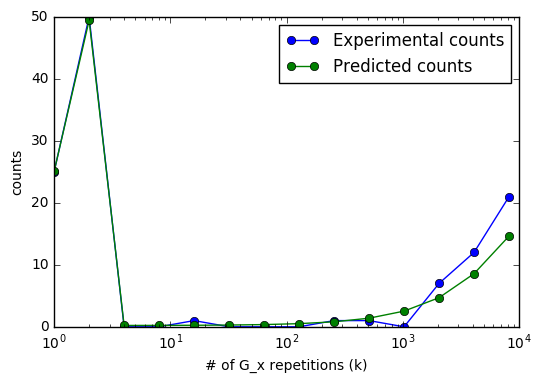

In [18]:
#This is a reproduction of Figure 1c (in publication made in DataGraph)
plt.semilogx(LList,expCountList,'-o',label='Experimental counts')
plt.semilogx(LList,simCountList,'-o',label='Predicted counts')
plt.xlabel('# of G_x repetitions (k)')
plt.ylabel('counts')
plt.legend()
plt.savefig('../Figures/Fig1c.pdf')
plt.show()